In [1]:
import time
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read the dataset
data = pd.read_csv('price-prediction.csv')
data

,PLOTS,PRICE
0,202,32046
1,279,44513
2,192,31482
3,114,19364
4,206,30279
...,...,...
95,253,39618
96,287,46181
97,223,35029
98,140,25091


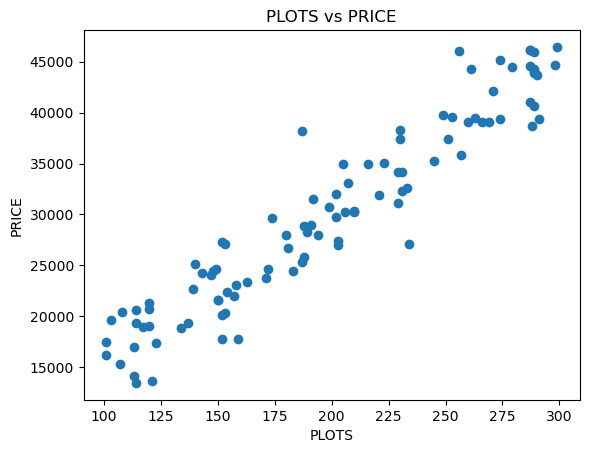

In [3]:
# Plot the original data
plt.scatter(data['PLOTS'], data['PRICE'])
plt.xlabel('PLOTS')
plt.ylabel('PRICE')
plt.title('PLOTS vs PRICE')
plt.show()

In [4]:
def plot_line(m, b, data):
    # Scatter plot of actual data
    plt.scatter(data['PLOTS'], data['PRICE'])

    # Get the smallest and largest plot sizes
    min_x = data['PLOTS'].min()
    max_x = data['PLOTS'].max()

    # Generate the predicted prices for the line
    x_vals = list(range(min_x, max_x + 1))
    y_vals = [m * x + b for x in x_vals]

    # Plot the regression line
    plt.plot(x_vals, y_vals, color='red')

    # Label axes and title
    plt.xlabel('PLOTS')
    plt.ylabel('PRICE')
    plt.title('Regression Line')
    plt.show()


def compute_loss(m, b, data):
    total_error = 0

    for i in range(len(data)):
        x = data.iloc[i]['PLOTS']
        y = data.iloc[i]['PRICE']
        prediction = m * x + b
        error = y - prediction
        total_error += error ** 2

    return total_error / len(data)


def gradient_descent_step(m, b, data, lr):
    m_grad = 0
    b_grad = 0
    N = len(data)

    for i in range(N):
        x = data.iloc[i]['PLOTS']
        y = data.iloc[i]['PRICE']
        prediction = m * x + b
        error = y - prediction
        m_grad += -2 * x * error
        b_grad += -2 * error

    m = m - (lr * m_grad / N)
    b = b - (lr * b_grad / N)

    return m, b

Epoch 1: m = 65.3837058, b = 0.30146290000000003, loss = 3262.7569371870063


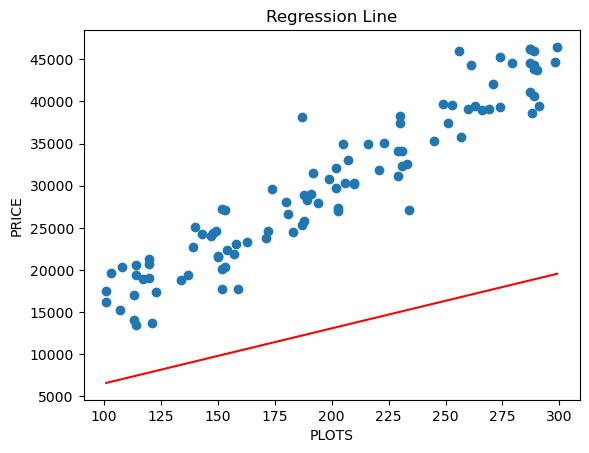

Epoch 2: m = 102.47926354436528, b = 0.47269805852914004, loss = 1105.908976273039


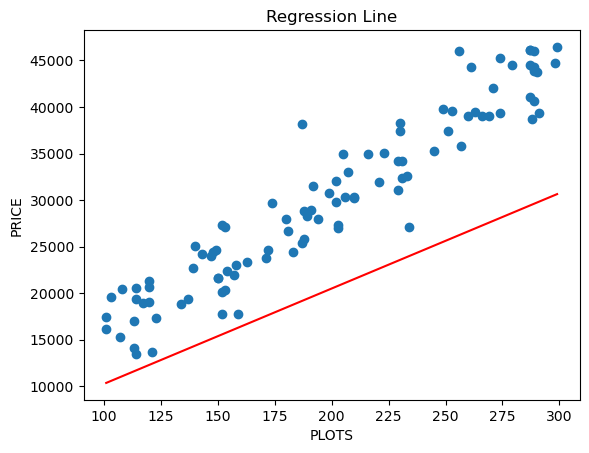

Epoch 3: m = 123.52549152314512, b = 0.5700482823472425, loss = 411.6455283437769


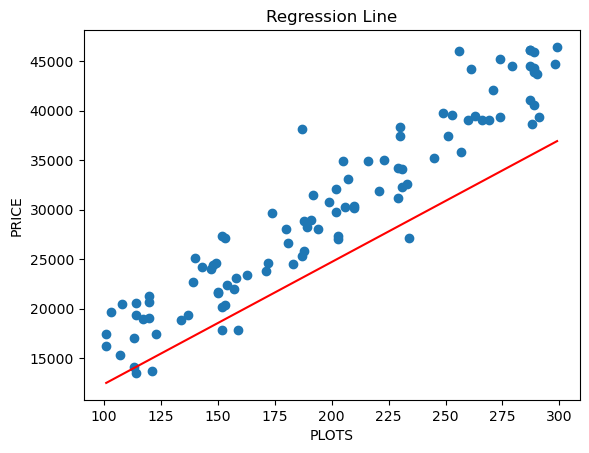

Epoch 4: m = 135.46610447835005, b = 0.6254797603977709, loss = 188.17046459898438


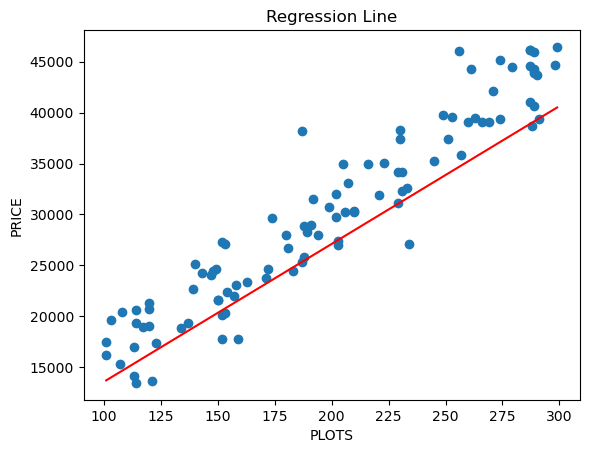

Epoch 5: m = 142.24063098829194, b = 0.6571285653106371, loss = 116.236525975719


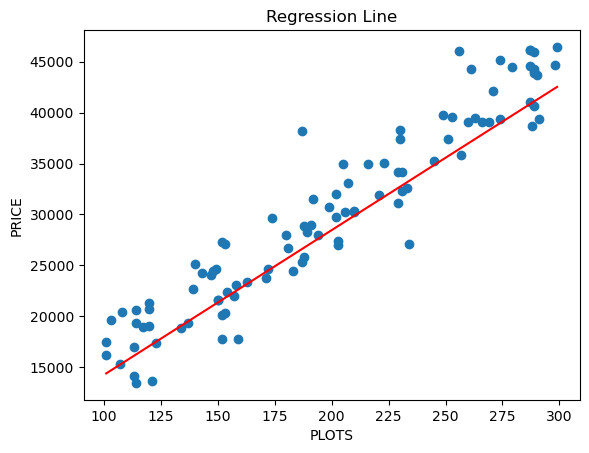


Final model:
m = 142.24063098829194
b = 0.6571285653106371


In [5]:
# Initial values
m = 0
b = 0
learning_rate = 0.000005
epochs = 5

# Training loop
for i in range(epochs):
    time.sleep(2)
    m, b = gradient_descent_step(m, b, data, learning_rate)
    print(f"Epoch {i+1}: m = {m}, b = {b}, loss = {compute_loss(m, b, data)/100000}")
    plot_line(m, b, data)

# Final model
print("\nFinal model:")
print(f"m = {m}")
print(f"b = {b}")

In [6]:
# Predict price for a user-given plot size
x_input = int(input("\nEnter the size of plot: "))
predicted_price = m * x_input + b
print(f"Predicted price for {x_input} size of plot: ${predicted_price:.2f}")

Predicted price for 206 size of plot: $29302.23
